# Chapter 3: Truss Optimization

Introduction to quantum annealing using D-Wave systems and QUBO formulations.

---

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [1]:
# Setup and imports for D-Wave
import numpy as np
import matplotlib.pyplot as plt

from Chapter03_TrussOptimization_functions import (truss3x3,truss2x2,
    TrussFEM)

print('Setup complete!')

Setup complete!


## Pick a truss example

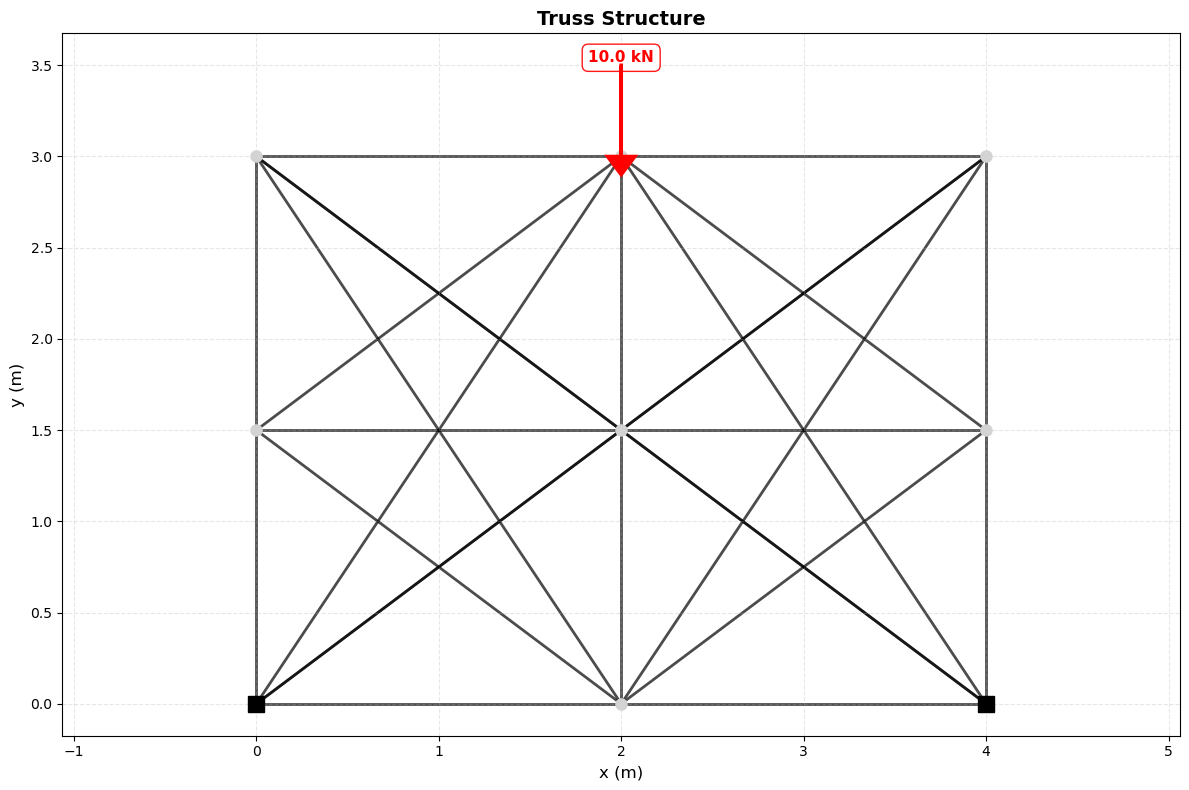

In [2]:
fem_model= truss3x3() # truss3x3, truss2x2
fem_model.plot_truss()

## Solving and plotting deformed truss

Design valid? True
Max displacement: 0.000057 m


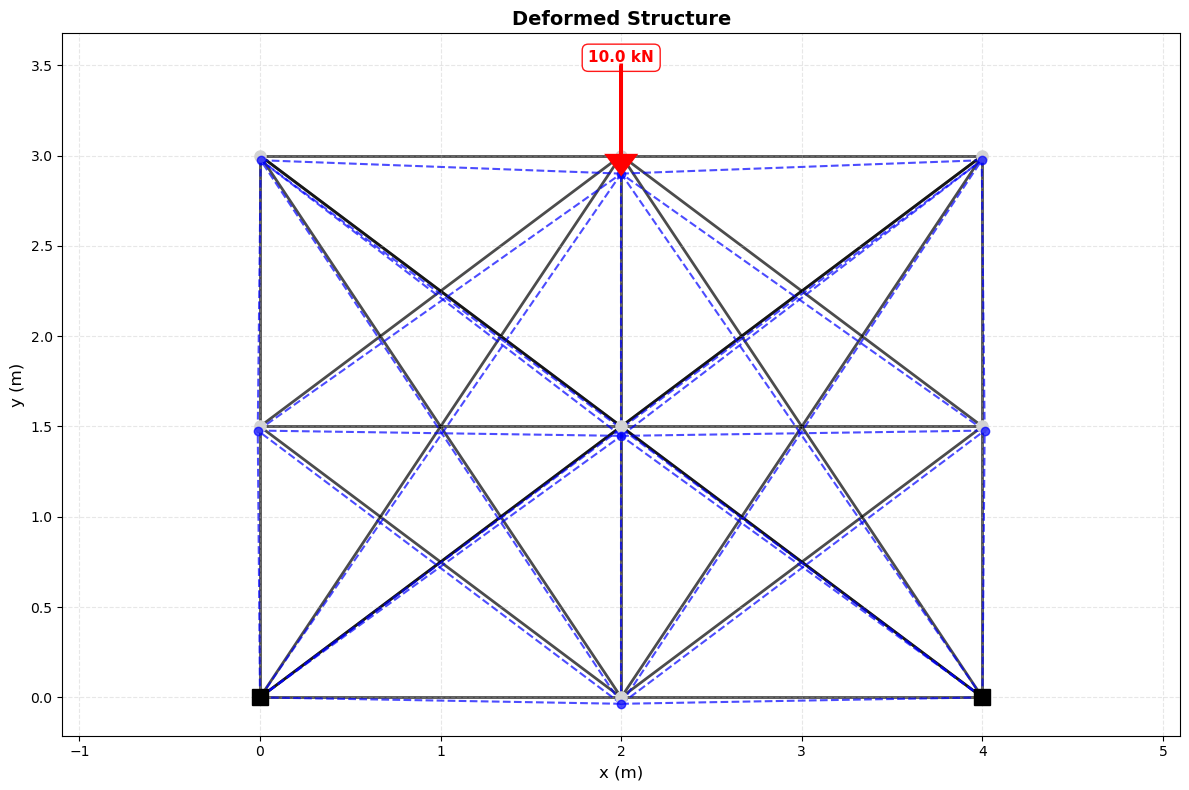

In [3]:
# Solve FEM for full design
d, valid = fem_model.solve()

print(f"Design valid? {valid}")
print(f"Max displacement: {abs(d).max():.6f} m")

# plot deformed truss
fem_model.plot_truss(displacements=d, 
                    title="Deformed Structure")


## Evaluating the metrics

In [4]:
# Design constraints

metrics = fem_model.evaluate_design()

fem_model.print_metrics(metrics)

  Weight: 513.56 kg
  Max displacement: 0.0568 mm
  Max stress: 3.64 MPa
  Compliance: 0.57 J
  Feasible: True


In [5]:
desiredWeightFraction = 0.5


#  Plot with a specific design
sub_structure = np.array([
    # Horizontal members (indices 0-5)
    1, 1,  # Bottom row: (0,1), (1,2) - CRITICAL for node 1 stability
    1, 1,  # Middle row: (3,4), (4,5) - lateral bracing
    0, 0,  # Top row: not needed (nodes 6,8 hanging)
    
    # Vertical members (indices 6-11)
    1, 0,  # Left column: (0,3) active
    1, 1,  # Center column: (1,4), (4,7) - load path
    1, 0,  # Right column: (2,5) active
    
    # In-square diagonals (indices 12-19)
    1, 0,  # (0,4) diagonal bracing
    0, 1,  # (2,4) diagonal bracing
    1, 0,  # (3,7) diagonal bracing
    0, 1,  # (5,7) diagonal bracing
    
    # Long diagonals (indices 20-25)
    0, 0, 0, 0, 0, 0
], dtype=int)

area = fem_model.A * sub_structure  # Zero area for inactive members
d_opt, valid_opt = fem_model.solve(area)
print(f"Number of active members: {np.sum(sub_structure)}")  # 10 members

metrics = fem_model.evaluate_design(area, desiredWeightFraction=desiredWeightFraction)


fem_model.print_metrics(metrics)



Number of active members: 12
  Weight: 188.40 kg
  Max displacement: 0.1359 mm
  Max stress: 5.47 MPa
  Compliance: 1.36 J
  Feasible: True


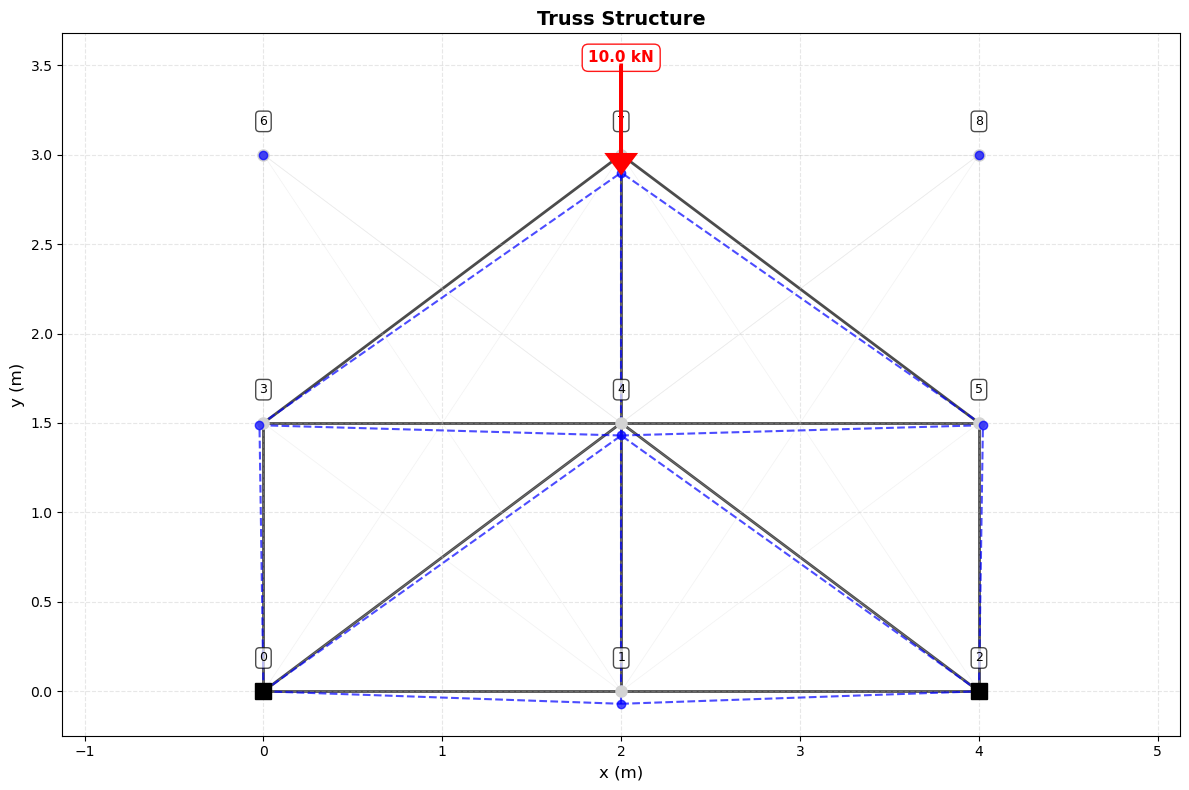

In [6]:

fem_model.plot_truss(design=sub_structure,
                    displacements=d_opt,
                    show_labels=True)


## Random search

In [7]:
M = 100000  # number of random samples
desiredWeightFraction = 0.5
random_search_design = fem_model.random_search(M, desiredWeightFraction)
print(f"Random search found design with {np.sum(random_search_design)} members.")



Sampling 100,000 random designs from 2^26 = 67,108,864 possible designs
Sampling rate: 0.1490%

Progress:  10.0% (10,000/100,000) | Elapsed: 2.2s | Remaining: ~20.2s | Feasible: 6
Progress:  20.0% (20,000/100,000) | Elapsed: 4.2s | Remaining: ~16.9s | Feasible: 10
Progress:  30.0% (30,000/100,000) | Elapsed: 6.1s | Remaining: ~14.3s | Feasible: 19
Progress:  40.0% (40,000/100,000) | Elapsed: 8.8s | Remaining: ~13.2s | Feasible: 59
Progress:  50.0% (50,000/100,000) | Elapsed: 11.9s | Remaining: ~11.9s | Feasible: 113
Progress:  60.0% (60,000/100,000) | Elapsed: 15.1s | Remaining: ~10.1s | Feasible: 184
Progress:  70.0% (70,000/100,000) | Elapsed: 18.6s | Remaining: ~8.0s | Feasible: 232
Progress:  80.0% (80,000/100,000) | Elapsed: 22.7s | Remaining: ~5.7s | Feasible: 246
Progress:  90.0% (90,000/100,000) | Elapsed: 26.9s | Remaining: ~3.0s | Feasible: 256
Progress: 100.0% (100,000/100,000) | Elapsed: 31.0s | Remaining: ~0.0s | Feasible: 267

Completed in 30.98 seconds (0.31 ms per desi

  Weight: 142.96 kg
  Max displacement: 0.1183 mm
  Max stress: 6.56 MPa
  Compliance: 1.18 J
  Feasible: True


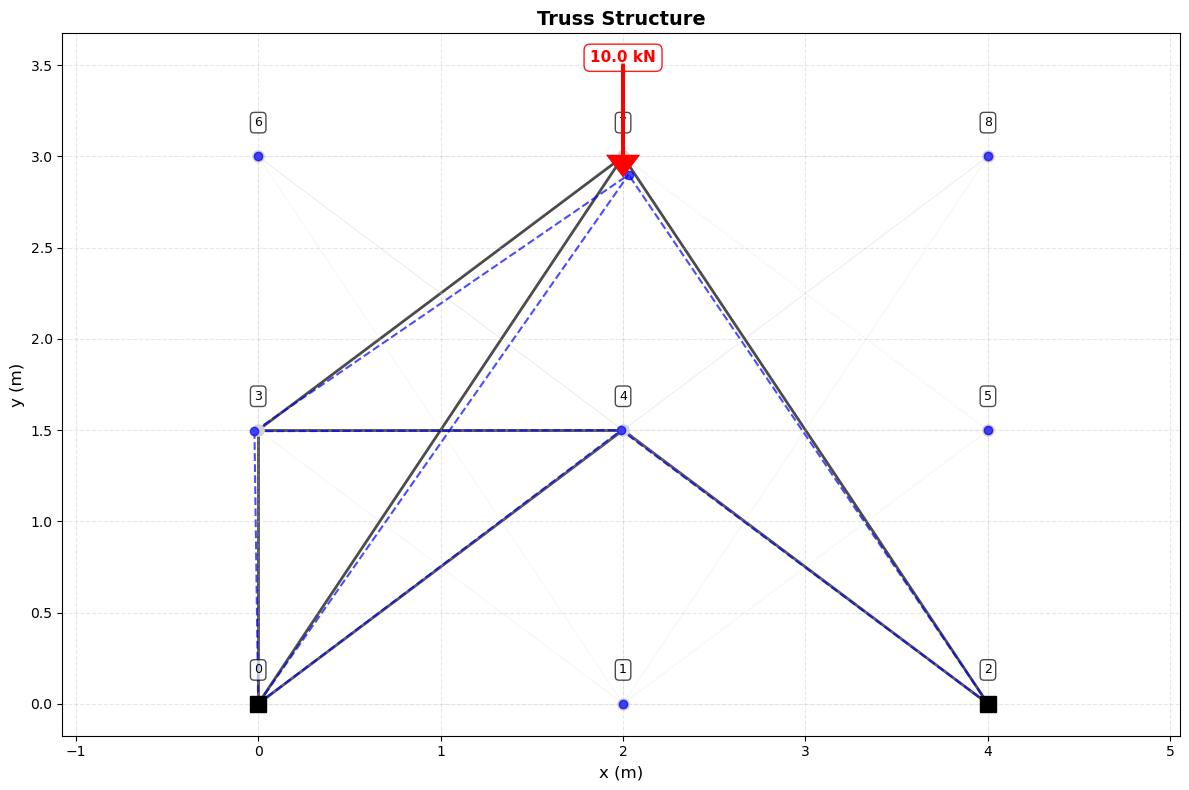

In [8]:
area = random_search_design * fem_model.A
d_search, valid_opt = fem_model.solve(area)

metrics = fem_model.evaluate_design(area, desiredWeightFraction=desiredWeightFraction)

fem_model.print_metrics(metrics)

fem_model.plot_truss(design=random_search_design, 
                    displacements=d_search, 
                    show_labels=True)

